ML MAJOR PROJECT

OBJECTIVE:

To predict the cost of used cars

PROCESS:

1.Detailed analysis of the data set given.

2.To choose the best attributes to train the data.

3.To drop the outliers of the key attributes using box plot.

4.To select the appropriate regression model to train the data.

5.Visual description of the regression model

6.Predicting the price of the used cars in the test dataset.


In [3]:
#Mounting google drive
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Reading trained data and test data
data=pd.read_excel("/content/drive/My Drive/Data_Train (1).xlsx")
datatest=pd.read_excel("/content/drive/My Drive/Data_Test (1).xlsx")

In [0]:
print(data.head())

                               Name    Location  Year  ...  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010  ...    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011  ...    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012  ...    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...    5.0        NaN  17.74

[5 rows x 13 columns]


In [0]:
#Analysis of null values in the data set
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [0]:
data['Mileage'].notnull().sum()

6017

In [0]:
import numpy as np 
bin1=np.linspace((min((data['Kilometers_Driven']))),(max((data['Kilometers_Driven']))),50)
group_values=list(range(1,50))
data['Kilometers_Driven-binned']=pd.cut(data['Kilometers_Driven'],bin1,labels=group_values,include_lowest=True)

In [0]:
data.head(100)


0     58.16
1     126.2
2      88.7
3     88.76
4     140.8
      ...  
95     98.6
96     73.9
97      110
98     67.1
99    103.5
Name: Power, Length: 100, dtype: object

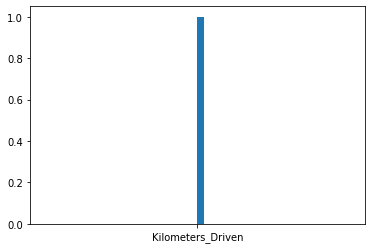

In [28]:
import matplotlib.pyplot as plt
plt.hist('Kilometers_Driven',bins=50)
plt.show()

In [27]:
data.corr()

,Year,Kilometers_Driven,Mileage,Seats,Price
Year,1.000000,-0.506217,0.276998,0.054527,0.300891
Kilometers_Driven,-0.506217,1.000000,-0.121162,0.170875,-0.182115
Mileage,0.276998,-0.121162,1.000000,-0.321053,-0.344306
Seats,0.054527,0.170875,-0.321053,1.000000,0.066537
Price,0.300891,-0.182115,-0.344306,0.066537,1.000000


In [35]:

import seaborn as sns
import matplotlib.pyplot as plt
print(data)


                                                 Name  ...  Price
0                           BMW X5 xDrive 30d M Sport  ...  65.00
1              Skoda Octavia Ambition Plus 2.0 TDI AT  ...   7.50
2                    Volkswagen Vento Diesel Highline  ...   5.90
3                               Hyundai i10 Magna 1.2  ...   2.70
4     Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  ...  13.00
...                                               ...  ...    ...
6014       Ford Figo 2015-2019 1.2P Sports Edition MT  ...   6.80
6015           Hyundai i20 Active SX Dual Tone Petrol  ...   8.60
6016                                 Renault KWID RXL  ...   3.40
6017                       Maruti Wagon R ZXI AMT 1.2  ...   6.25
6018                    Maruti Alto 800 2016-2019 VXI  ...   3.60

[6019 rows x 13 columns]


In [41]:

data.fillna(data.mean(), inplace=True)
data['Mileage']=data['Mileage'].astype(str)
data['Mileage']=data['Mileage'].map(lambda x: x.replace(' kmpl',''))
data['Mileage']=data['Mileage'].map(lambda x: x.replace(' km/kg',''))
data['Mileage']=data['Mileage'].astype(float)
datatest['Mileage']=datatest['Mileage'].astype(str)
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace(' kmpl',''))
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace(' km/kg',''))
datatest['Mileage']=datatest['Mileage'].astype(float)
print(data)

                                             Name Location  ...   New_Price  Price
296                          Ford Figo Diesel ZXI  Chennai  ...         NaN   2.60
297                              Maruti Swift VDI     Pune  ...         NaN   3.75
298   Fiat Grande Punto 1.3 Emotion Pack (Diesel)    Delhi  ...         NaN   1.65
300                             Chevrolet Beat LS  Kolkata  ...         NaN   2.50
301          Tata Indica Vista Aura 1.3 Quadrajet  Chennai  ...         NaN   1.75
...                                           ...      ...  ...         ...    ...
6014   Ford Figo 2015-2019 1.2P Sports Edition MT   Mumbai  ...         NaN   6.80
6015       Hyundai i20 Active SX Dual Tone Petrol     Pune  ...  10.25 Lakh   8.60
6016                             Renault KWID RXL     Pune  ...   4.45 Lakh   3.40
6017                   Maruti Wagon R ZXI AMT 1.2   Mumbai  ...    6.8 Lakh   6.25
6018                Maruti Alto 800 2016-2019 VXI   Mumbai  ...         NaN   3.60

[56

FINDING THE KEY ATTRIBUTES


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


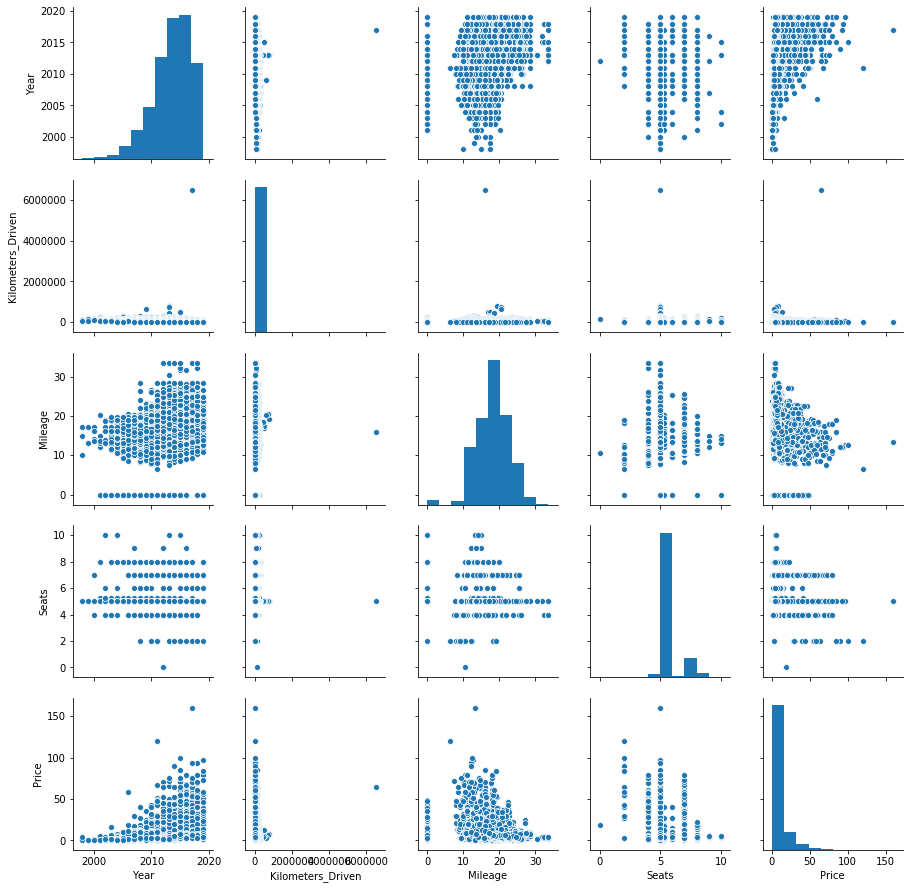

In [8]:
#Finding the best attributes to train the model by plotting against every two attributes
sns.pairplot(data)

IDENTIFYING OUTLIERS

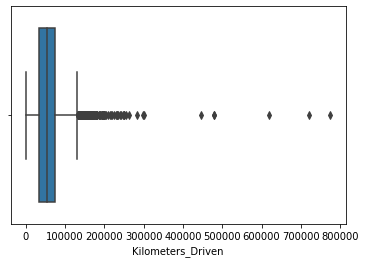

In [22]:
sns.boxplot(x=data['Kilometers_Driven'])


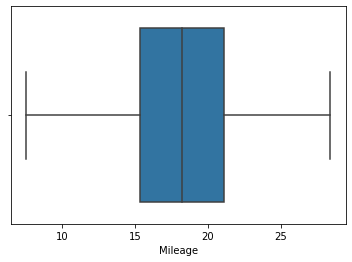

In [21]:
sns.boxplot(x=data['Mileage'])

In [0]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [0]:
data.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,6019,824
unique,1876,11,5,2,4,442,146,373,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [0]:
data['Fuel_Type'].count()

6019

(0, 187.220063099939)

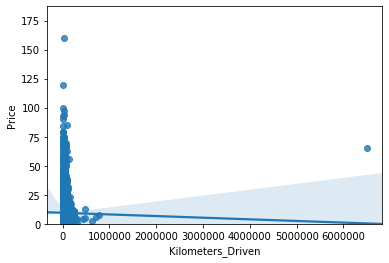

In [13]:
sns.regplot(x='Kilometers_Driven',y='Price',data=data)
plt.ylim(0,)

In [0]:
from scipy import stats

In [15]:
pearson_coef, p_value = stats.pearsonr(data['Kilometers_Driven'], data['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.011492790740116129  with a P-value of P = 0.37267149856991005


TRAINING THE MODEL,VISUALISATION OF MODEL:

11292 5646


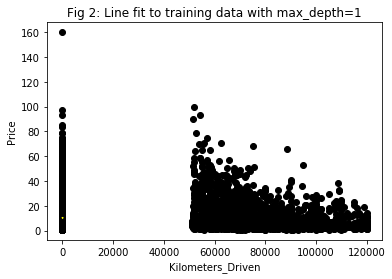

Training MSE:  127.42413711483177
11292 5646


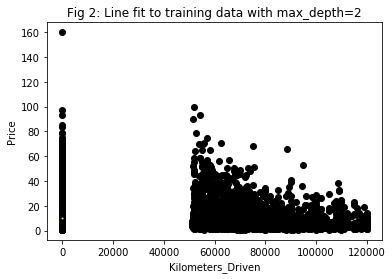

Training MSE:  128.18583884239794
11292 5646


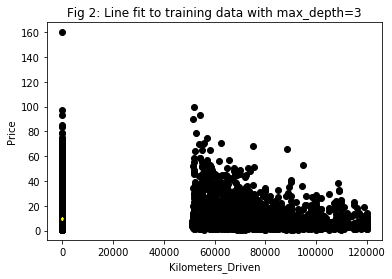

Training MSE:  129.7461317295174
11292 5646


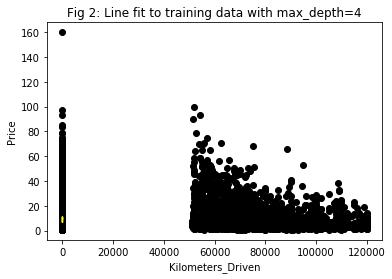

Training MSE:  130.82742188221292


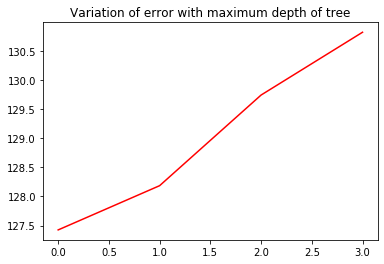

In [47]:
from sklearn import tree
import numpy as np
import statistics
data.fillna(data.mean(), inplace=True)
maximum_depth_of_tree = np.arange(4)+1
train_err_arr = []
#test_err_arr=[]
data.drop(data[data.Mileage < 7].index, inplace=True)
data.drop(data[data.Mileage > 30].index, inplace=True)
data.drop(data[data.Kilometers_Driven > 120000].index, inplace=True)
#data1=data[data['Kilometers_Driven']!=6500000]
for depth in maximum_depth_of_tree:
  lm = tree.DecisionTreeRegressor(max_depth=depth)
  #x=data[data['Kilometers_Driven']<6000000]
  x=data[['Mileage']+['Kilometers_Driven']]
  y=data[['Price']]
  print(x.size,y.size)
  arr = x.values.copy()
  arr.resize(y.size, 1)
  x=pd.DataFrame(arr)
  lm.fit(x,y)
#Fit the line to the training data

#Plot the line
  xtest=datatest[['Mileage']]
  #ytest=datatest[['Price']]
  plt.scatter(x, y, color='black')
  plt.plot(xtest.values,lm.predict(xtest.values),color='yellow')
  plt.xlabel('Kilometers_Driven')
  plt.ylabel('Price')
  plt.title('Fig 2: Line fit to training data with max_depth='+str(depth))
  plt.show()
  mean_val_error =np.mean((y.values - lm.predict(x.values))**2,dtype=np.float64)
  train_err_arr.append(mean_val_error)
  #test_err_arr.append(mean_test_error)
  print('Training MSE: ', mean_val_error)
  #print('Testing MSE: ', mean_test_error)
plt.figure()
plt.plot(train_err_arr,c='red')
#plt.plot(test_err_arr,c='green')
plt.title('Variation of error with maximum depth of tree')
plt.show()

In [61]:
pred=[]
for i in xtest.values:
  pred.append(lm.predict([i]))
datatest['Predicted value']=pred
datatest['Predicted value']=datatest['Predicted value'].astype(float)
print(datatest)

                                                   Name  ... Predicted value
0                               Maruti Alto K10 LXI CNG  ...        9.606053
1                         Maruti Alto 800 2016-2019 LXI  ...        9.606053
2             Toyota Innova Crysta Touring Sport 2.4 MT  ...       11.046491
3                                  Toyota Etios Liva GD  ...        9.606053
4                                     Hyundai i20 Magna  ...        9.606053
...                                                 ...  ...             ...
1229                  Volkswagen Vento Diesel Trendline  ...        9.606053
1230                             Volkswagen Polo GT TSI  ...        9.606053
1231                             Nissan Micra Diesel XV  ...        9.606053
1232                             Volkswagen Polo GT TSI  ...        9.606053
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  ...        8.958962

[1234 rows x 13 columns]


CONCLUSION:

Thus the model has been trained and the cost of the used cars are predicted successfully as shown above.